Taken from website:-
https://ourworldindata.org/coronavirus-source-data

Import libraries

In [1]:
import pandas as pd
import numpy as np

Read files

In [2]:
# load datasets
train = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57987,ZWE,Africa,Zimbabwe,2020-12-30,13625.0,300.0,138.429,360.0,1.0,4.286,916.710,20.184,9.314,24.221,0.067,0.288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2462.0,214577.0,14.437,0.166,1651.0,0.111,0.084,11.9,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57988,ZWE,Africa,Zimbabwe,2020-12-31,13867.0,242.0,154.429,363.0,3.0,3.429,932.993,16.282,10.390,24.423,0.202,0.231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57989,ZWE,Africa,Zimbabwe,2021-01-01,14084.0,217.0,172.000,369.0,6.0,4.000,947.593,14.600,11.572,24.827,0.404,0.269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57990,ZWE,Africa,Zimbabwe,2021-01-02,14491.0,407.0,218.286,377.0,8.0,5.143,974.976,27.384,14.687,25.365,0.538,0.346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57992 entries, 0 to 57991
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57660 non-null  object 
 1   continent                           57312 non-null  object 
 2   location                            57992 non-null  object 
 3   date                                57992 non-null  object 
 4   total_cases                         57435 non-null  float64
 5   new_cases                           57428 non-null  float64
 6   new_cases_smoothed                  56473 non-null  float64
 7   total_deaths                        49126 non-null  float64
 8   new_deaths                          49125 non-null  float64
 9   new_deaths_smoothed                 56473 non-null  float64
 10  total_cases_per_million             57103 non-null  float64
 11  new_cases_per_million               57096

In [4]:
country = "United States"

include_us = train[train['location'].values == country]
exclude_us = train[train['location'].values != country]
include_us

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
54851,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
54852,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
54853,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
54854,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
54855,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55194,USA,North America,United States,2020-12-30,19740772.0,229346.0,182041.143,342318.0,3750.0,2313.429,59639.318,692.883,549.969,1034.185,11.329,6.989,NaN,23069.0,69.694,125220.0,378.305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2794588.0,0.84,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
55195,USA,North America,United States,2020-12-31,19968087.0,227315.0,186106.286,345737.0,3419.0,2387.714,60326.064,686.747,562.250,1044.514,10.329,7.214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
55196,USA,North America,United States,2021-01-01,20128693.0,160606.0,194737.714,347788.0,2051.0,2506.000,60811.275,485.211,588.327,1050.711,6.196,7.571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
55197,USA,North America,United States,2021-01-02,20426184.0,297491.0,204865.429,350186.0,2398.0,2611.000,61710.032,898.757,618.924,1057.955,7.245,7.888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4225756.0,1.28,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924


In [5]:
us_newdeath = pd.DataFrame({'date':include_us.date , 'new_cases': include_us.new_cases, 'icu_patients':include_us.icu_patients, 'new_deaths': include_us.new_deaths}).reset_index()
us_newdeath

,index,date,new_cases,icu_patients,new_deaths
0,54851,2020-01-22,NaN,NaN,NaN
1,54852,2020-01-23,0.0,NaN,NaN
2,54853,2020-01-24,1.0,NaN,NaN
3,54854,2020-01-25,0.0,NaN,NaN
4,54855,2020-01-26,3.0,NaN,NaN
...,...,...,...,...,...
343,55194,2020-12-30,229346.0,23069.0,3750.0
344,55195,2020-12-31,227315.0,NaN,3419.0
345,55196,2021-01-01,160606.0,NaN,2051.0
346,55197,2021-01-02,297491.0,NaN,2398.0


Rename columns

In [6]:
us_newdeath.rename(columns={'date':'ds', 'new_cases': 'add1', 'icu_patients': 'add2','new_deaths': 'y'}, inplace=True)
us_newdeath

,index,ds,add1,add2,y
0,54851,2020-01-22,NaN,NaN,NaN
1,54852,2020-01-23,0.0,NaN,NaN
2,54853,2020-01-24,1.0,NaN,NaN
3,54854,2020-01-25,0.0,NaN,NaN
4,54855,2020-01-26,3.0,NaN,NaN
...,...,...,...,...,...
343,55194,2020-12-30,229346.0,23069.0,3750.0
344,55195,2020-12-31,227315.0,NaN,3419.0
345,55196,2021-01-01,160606.0,NaN,2051.0
346,55197,2021-01-02,297491.0,NaN,2398.0


Graph time series

Text(0, 0.5, 'y')

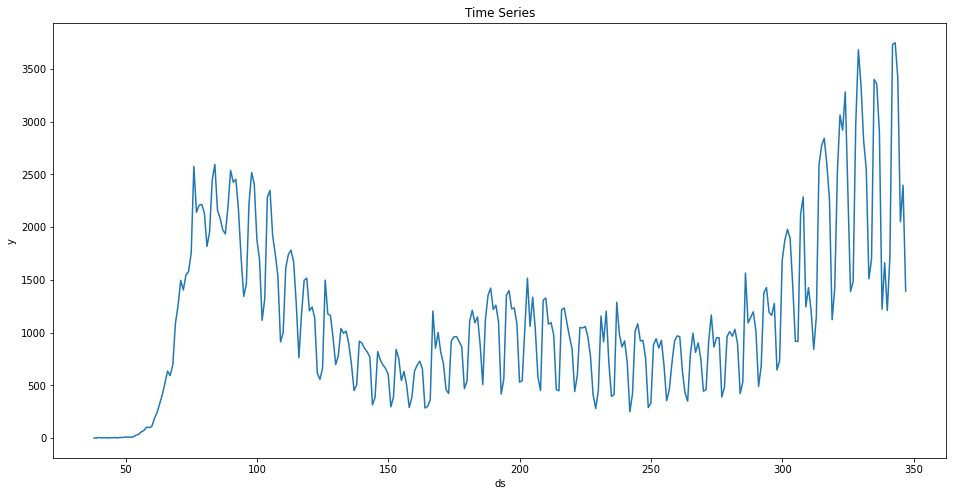

In [7]:
import matplotlib.pyplot as plt

us_newdeath['y'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("ds") 
plt.ylabel("y")

Check for null values

In [8]:
us_newdeath.isnull().sum()

index     0
ds        0
add1      1
add2     68
y        38
dtype: int64

In [9]:
us_newdeath.fillna(0, inplace=True)
us_newdeath.isnull().sum().sum()

0

Split time series

In [10]:
month = '2021-02'

test = pd.DataFrame({
    'date': pd.date_range(
        start = pd.Timestamp(month),                        
        end = pd.Timestamp(month) + pd.offsets.MonthEnd(0),
        freq = 'D'
    )
})
test

,date
0,2021-02-01
1,2021-02-02
2,2021-02-03
3,2021-02-04
4,2021-02-05
5,2021-02-06
6,2021-02-07
7,2021-02-08
8,2021-02-09
9,2021-02-10


In [11]:
test['new_case'] = us_newdeath.add1.max()
test['icu_patients'] = us_newdeath.add2.max()
test

,date,new_case,icu_patients
0,2021-02-01,297491.0,23069.0
1,2021-02-02,297491.0,23069.0
2,2021-02-03,297491.0,23069.0
3,2021-02-04,297491.0,23069.0
4,2021-02-05,297491.0,23069.0
5,2021-02-06,297491.0,23069.0
6,2021-02-07,297491.0,23069.0
7,2021-02-08,297491.0,23069.0
8,2021-02-09,297491.0,23069.0
9,2021-02-10,297491.0,23069.0


In [12]:
test.rename(columns={'date':'ds', 'new_case': 'add1', 'icu_patients': 'add2'}, inplace=True)
test

,ds,add1,add2
0,2021-02-01,297491.0,23069.0
1,2021-02-02,297491.0,23069.0
2,2021-02-03,297491.0,23069.0
3,2021-02-04,297491.0,23069.0
4,2021-02-05,297491.0,23069.0
5,2021-02-06,297491.0,23069.0
6,2021-02-07,297491.0,23069.0
7,2021-02-08,297491.0,23069.0
8,2021-02-09,297491.0,23069.0
9,2021-02-10,297491.0,23069.0


In [13]:
X_train = us_newdeath.loc[us_newdeath["ds"]<"2020-12-01"]
X_val  = us_newdeath.loc[us_newdeath["ds"]>="2020-12-01"]
X_test = test.loc[test["ds"]>="2021-02-01"]

FB Prophet

In [14]:
from fbprophet import Prophet

model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.fit(X_train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict on validation set

In [15]:
forecast = model.predict(X_val.drop(columns="y"))
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,add2_lower,add2_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-01,564.920398,1789.506966,2413.177362,564.920398,564.920398,-268.341774,-268.341774,-268.341774,1608.726713,1608.726713,1608.726713,1526.415886,1526.415886,1526.415886,1340.384939,1340.384939,1340.384939,186.030946,186.030946,186.030946,0.0,0.0,0.0,2091.336284
1,2020-12-02,562.784230,1817.167611,2446.757281,562.784230,562.784230,-300.260564,-300.260564,-300.260564,1659.612023,1659.612023,1659.612023,1583.125549,1583.125549,1583.125549,1359.351459,1359.351459,1359.351459,223.774090,223.774090,223.774090,0.0,0.0,0.0,2145.909779
2,2020-12-03,560.648062,1712.774135,2328.622284,560.631452,560.665511,-336.608442,-336.608442,-336.608442,1665.295317,1665.295317,1665.295317,1443.706319,1443.706319,1443.706319,1328.686875,1328.686875,1328.686875,115.019444,115.019444,115.019444,0.0,0.0,0.0,2004.354381
3,2020-12-04,558.511894,1683.397967,2305.142467,558.406795,558.589431,-356.160870,-356.160870,-356.160870,1683.138218,1683.138218,1683.138218,1440.286088,1440.286088,1440.286088,1326.977348,1326.977348,1326.977348,113.308740,113.308740,113.308740,0.0,0.0,0.0,1998.797982
4,2020-12-05,556.375725,1557.200117,2193.457418,556.141293,556.546776,-329.368991,-329.368991,-329.368991,1694.901316,1694.901316,1694.901316,1331.896586,1331.896586,1331.896586,1365.532325,1365.532325,1365.532325,-33.635738,-33.635738,-33.635738,0.0,0.0,0.0,1888.272312
5,2020-12-06,554.239557,1356.363691,1986.846471,553.897607,554.561612,-263.222489,-263.222489,-263.222489,1721.070904,1721.070904,1721.070904,1118.386370,1118.386370,1118.386370,1457.848415,1457.848415,1457.848415,-339.462045,-339.462045,-339.462045,0.0,0.0,0.0,1672.625927
6,2020-12-07,552.103389,1431.127060,2047.351470,551.657041,552.567486,-279.489804,-279.489804,-279.489804,1714.858931,1714.858931,1714.858931,1170.333690,1170.333690,1170.333690,1435.369127,1435.369127,1435.369127,-265.035437,-265.035437,-265.035437,0.0,0.0,0.0,1722.437079
7,2020-12-08,549.967221,1854.625871,2483.521481,549.395497,550.610886,-334.940146,-334.940146,-334.940146,1765.744240,1765.744240,1765.744240,1616.835041,1616.835041,1616.835041,1430.804094,1430.804094,1430.804094,186.030946,186.030946,186.030946,0.0,0.0,0.0,2166.802261
8,2020-12-09,547.831053,1947.040889,2571.651964,547.084697,548.652645,-340.507488,-340.507488,-340.507488,1821.651996,1821.651996,1821.651996,1704.918599,1704.918599,1704.918599,1481.144508,1481.144508,1481.144508,223.774090,223.774090,223.774090,0.0,0.0,0.0,2252.749651
9,2020-12-10,545.694884,1818.075875,2465.141814,544.772827,546.690904,-351.327578,-351.327578,-351.327578,1837.115844,1837.115844,1837.115844,1600.807709,1600.807709,1600.807709,1485.788265,1485.788265,1485.788265,115.019444,115.019444,115.019444,0.0,0.0,0.0,2146.502593


In [16]:
# Calculating the RMSE of the model
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(X_val['y'], forecast['yhat'])) 
print(rms)

1313.8069755925437


In [17]:
forecast.yhat[forecast.yhat < 0] = 0

df_val=pd.DataFrame({'actual': X_val.y.values, 'predicted': forecast.yhat.values.astype(int)})
df_val.reset_index(drop=True, inplace=True)
df_val

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,actual,predicted
0,2588.0,2091
1,2775.0,2145
2,2843.0,2004
3,2594.0,1998
4,2257.0,1888
5,1122.0,1672
6,1419.0,1722
7,2520.0,2166
8,3064.0,2252
9,2920.0,2146


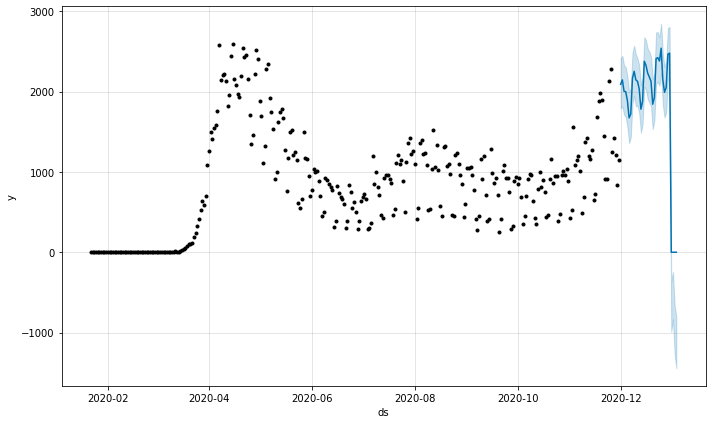

In [18]:
fig1 = model.plot(forecast)

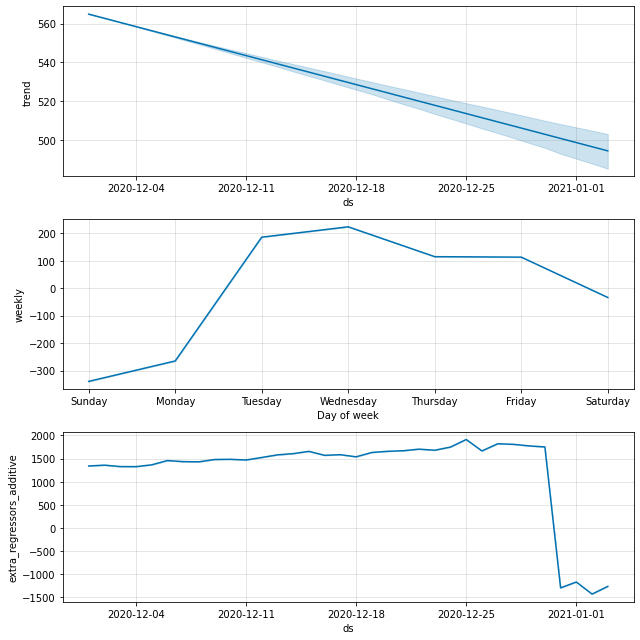

In [19]:
fig2 = model.plot_components(forecast)

In [20]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [21]:
plot_components_plotly(model, forecast)

Predict on test set

In [22]:
prediction = model.predict(X_test)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,add2_lower,add2_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-01,432.477969,1496.463294,2093.125492,409.769433,458.395387,-484.575802,-484.575802,-484.575802,2107.534918,2107.534918,2107.534918,1357.923679,1357.923679,1357.923679,1622.959116,1622.959116,1622.959116,-265.035437,-265.035437,-265.035437,0.0,0.0,0.0,1790.401648
1,2021-02-02,430.341801,1945.108467,2540.962475,407.091292,456.842725,-484.575802,-484.575802,-484.575802,2107.534918,2107.534918,2107.534918,1808.990063,1808.990063,1808.990063,1622.959116,1622.959116,1622.959116,186.030946,186.030946,186.030946,0.0,0.0,0.0,2239.331863
2,2021-02-03,428.205633,1971.083326,2586.204280,404.352329,455.462475,-484.575802,-484.575802,-484.575802,2107.534918,2107.534918,2107.534918,1846.733206,1846.733206,1846.733206,1622.959116,1622.959116,1622.959116,223.774090,223.774090,223.774090,0.0,0.0,0.0,2274.938839
3,2021-02-04,426.069464,1854.296743,2507.545888,401.645741,454.075466,-484.575802,-484.575802,-484.575802,2107.534918,2107.534918,2107.534918,1737.978560,1737.978560,1737.978560,1622.959116,1622.959116,1622.959116,115.019444,115.019444,115.019444,0.0,0.0,0.0,2164.048024
4,2021-02-05,423.933296,1842.947078,2456.906293,399.052864,452.754961,-484.575802,-484.575802,-484.575802,2107.534918,2107.534918,2107.534918,1736.267856,1736.267856,1736.267856,1622.959116,1622.959116,1622.959116,113.308740,113.308740,113.308740,0.0,0.0,0.0,2160.201152
5,2021-02-06,421.797128,1706.126288,2296.695017,396.408503,451.594230,-484.575802,-484.575802,-484.575802,2107.534918,2107.534918,2107.534918,1589.323378,1589.323378,1589.323378,1622.959116,1622.959116,1622.959116,-33.635738,-33.635738,-33.635738,0.0,0.0,0.0,2011.120506
6,2021-02-07,419.660960,1379.513194,2008.239809,393.897312,449.998565,-484.575802,-484.575802,-484.575802,2107.534918,2107.534918,2107.534918,1283.497071,1283.497071,1283.497071,1622.959116,1622.959116,1622.959116,-339.462045,-339.462045,-339.462045,0.0,0.0,0.0,1703.158031
7,2021-02-08,417.524791,1460.647228,2100.033824,391.111953,448.312255,-484.575802,-484.575802,-484.575802,2107.534918,2107.534918,2107.534918,1357.923679,1357.923679,1357.923679,1622.959116,1622.959116,1622.959116,-265.035437,-265.035437,-265.035437,0.0,0.0,0.0,1775.448471
8,2021-02-09,415.388623,1899.077519,2527.104044,388.265533,446.870474,-484.575802,-484.575802,-484.575802,2107.534918,2107.534918,2107.534918,1808.990063,1808.990063,1808.990063,1622.959116,1622.959116,1622.959116,186.030946,186.030946,186.030946,0.0,0.0,0.0,2224.378686
9,2021-02-10,413.252455,1951.330044,2548.891764,385.661698,445.565837,-484.575802,-484.575802,-484.575802,2107.534918,2107.534918,2107.534918,1846.733206,1846.733206,1846.733206,1622.959116,1622.959116,1622.959116,223.774090,223.774090,223.774090,0.0,0.0,0.0,2259.985661


In [23]:
prediction.yhat[prediction.yhat < 0] = 0

output = pd.DataFrame({'date': test.ds, 'new_death': prediction.yhat.values.astype(int)})
output.to_csv('p_new_death.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
#upload submission
p_new_death = pd.read_csv("p_new_death.csv")
p_new_death

,date,new_death
0,2021-02-01,1790
1,2021-02-02,2239
2,2021-02-03,2274
3,2021-02-04,2164
4,2021-02-05,2160
5,2021-02-06,2011
6,2021-02-07,1703
7,2021-02-08,1775
8,2021-02-09,2224
9,2021-02-10,2259


In [25]:
df_out = forecast.append(prediction)
df_out

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,add2_lower,add2_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-01,564.920398,1789.506966,2413.177362,564.920398,564.920398,-268.341774,-268.341774,-268.341774,1608.726713,1608.726713,1608.726713,1526.415886,1526.415886,1526.415886,1340.384939,1340.384939,1340.384939,186.030946,186.030946,186.030946,0.0,0.0,0.0,2091.336284
1,2020-12-02,562.784230,1817.167611,2446.757281,562.784230,562.784230,-300.260564,-300.260564,-300.260564,1659.612023,1659.612023,1659.612023,1583.125549,1583.125549,1583.125549,1359.351459,1359.351459,1359.351459,223.774090,223.774090,223.774090,0.0,0.0,0.0,2145.909779
2,2020-12-03,560.648062,1712.774135,2328.622284,560.631452,560.665511,-336.608442,-336.608442,-336.608442,1665.295317,1665.295317,1665.295317,1443.706319,1443.706319,1443.706319,1328.686875,1328.686875,1328.686875,115.019444,115.019444,115.019444,0.0,0.0,0.0,2004.354381
3,2020-12-04,558.511894,1683.397967,2305.142467,558.406795,558.589431,-356.160870,-356.160870,-356.160870,1683.138218,1683.138218,1683.138218,1440.286088,1440.286088,1440.286088,1326.977348,1326.977348,1326.977348,113.308740,113.308740,113.308740,0.0,0.0,0.0,1998.797982
4,2020-12-05,556.375725,1557.200117,2193.457418,556.141293,556.546776,-329.368991,-329.368991,-329.368991,1694.901316,1694.901316,1694.901316,1331.896586,1331.896586,1331.896586,1365.532325,1365.532325,1365.532325,-33.635738,-33.635738,-33.635738,0.0,0.0,0.0,1888.272312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,2021-02-24,383.346100,1927.751643,2552.314766,345.844063,427.017623,-484.575802,-484.575802,-484.575802,2107.534918,2107.534918,2107.534918,1846.733206,1846.733206,1846.733206,1622.959116,1622.959116,1622.959116,223.774090,223.774090,223.774090,0.0,0.0,0.0,2230.079306
24,2021-02-25,381.209932,1825.063153,2445.728542,342.789315,425.877301,-484.575802,-484.575802,-484.575802,2107.534918,2107.534918,2107.534918,1737.978560,1737.978560,1737.978560,1622.959116,1622.959116,1622.959116,115.019444,115.019444,115.019444,0.0,0.0,0.0,2119.188492
25,2021-02-26,379.073764,1809.631245,2433.436689,339.859773,424.532700,-484.575802,-484.575802,-484.575802,2107.534918,2107.534918,2107.534918,1736.267856,1736.267856,1736.267856,1622.959116,1622.959116,1622.959116,113.308740,113.308740,113.308740,0.0,0.0,0.0,2115.341620
26,2021-02-27,376.937595,1652.429918,2282.521912,336.887620,423.286473,-484.575802,-484.575802,-484.575802,2107.534918,2107.534918,2107.534918,1589.323378,1589.323378,1589.323378,1622.959116,1622.959116,1622.959116,-33.635738,-33.635738,-33.635738,0.0,0.0,0.0,1966.260973


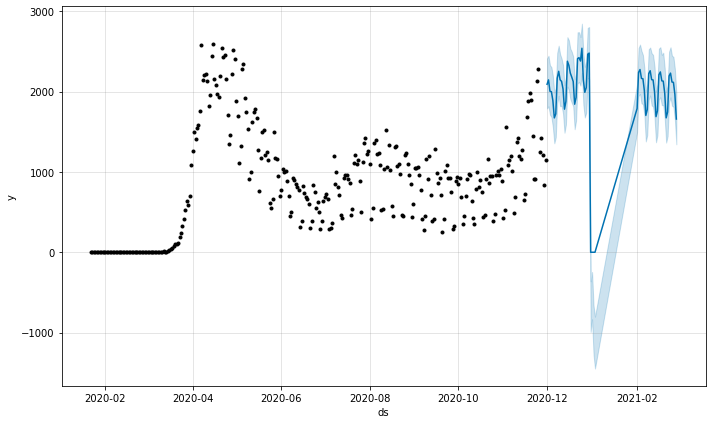

In [26]:
fig1 = model.plot(df_out)

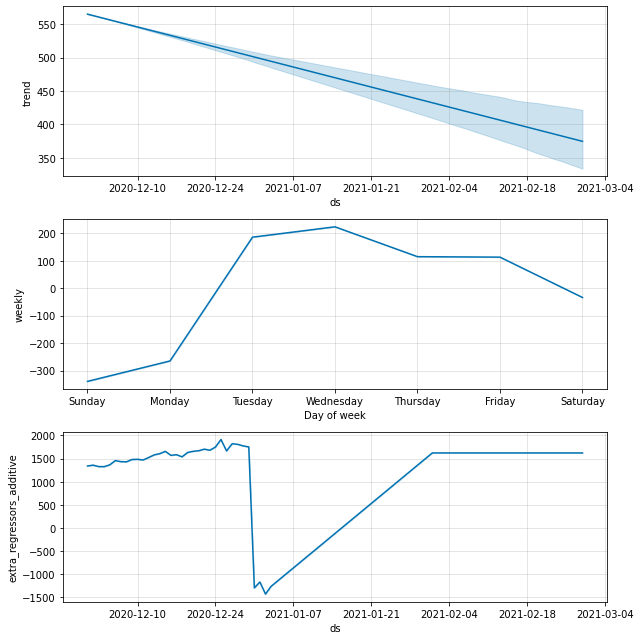

In [27]:
fig2 = model.plot_components(df_out)

In [28]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, df_out)

In [29]:
plot_components_plotly(model, df_out)

Statsmodels

Naive approach

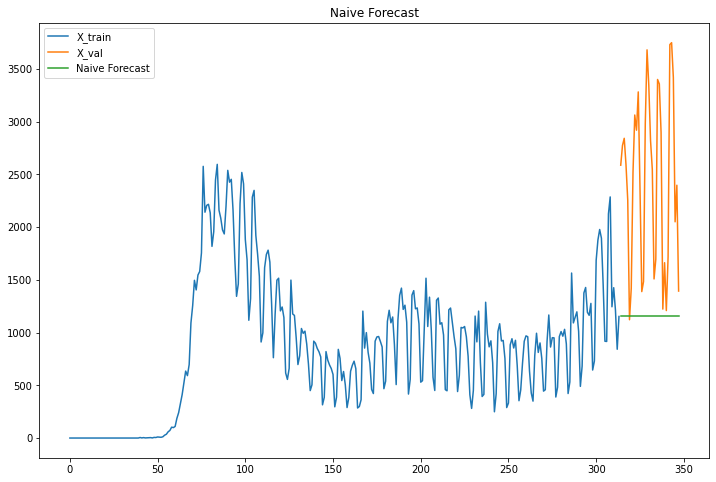

In [30]:
#naive approach
dd= np.asarray(X_train.y) 
y_hat = X_val.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [31]:
y_hat

,index,ds,add1,add2,y,naive
314,55165,2020-12-01,184079.0,19295.0,2588.0,1153.0
315,55166,2020-12-02,200820.0,19680.0,2775.0,1153.0
316,55167,2020-12-03,219884.0,19723.0,2843.0,1153.0
317,55168,2020-12-04,230139.0,19858.0,2594.0,1153.0
318,55169,2020-12-05,216087.0,19947.0,2257.0,1153.0
319,55170,2020-12-06,181394.0,20145.0,1122.0,1153.0
320,55171,2020-12-07,189926.0,20098.0,1419.0,1153.0
321,55172,2020-12-08,219009.0,20483.0,2520.0,1153.0
322,55173,2020-12-09,221929.0,20906.0,3064.0,1153.0
323,55174,2020-12-10,227604.0,21023.0,2920.0,1153.0


In [32]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(X_val.y, y_hat.naive)) 
print(rms)

1533.0831008518903


Moving Average

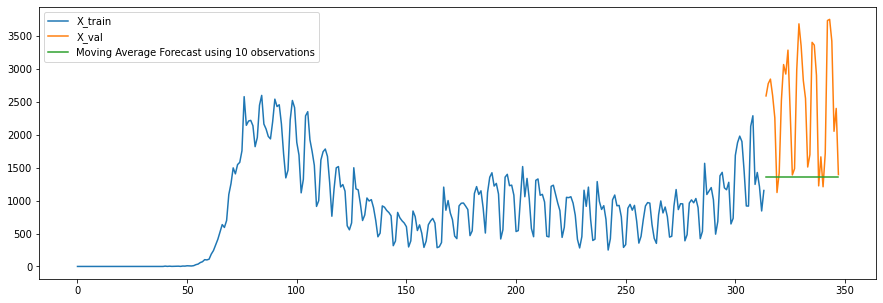

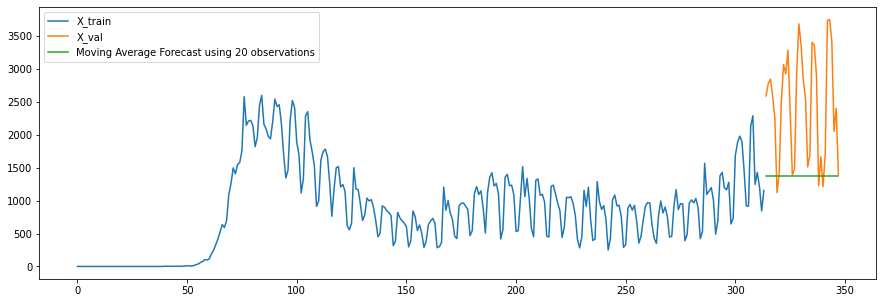

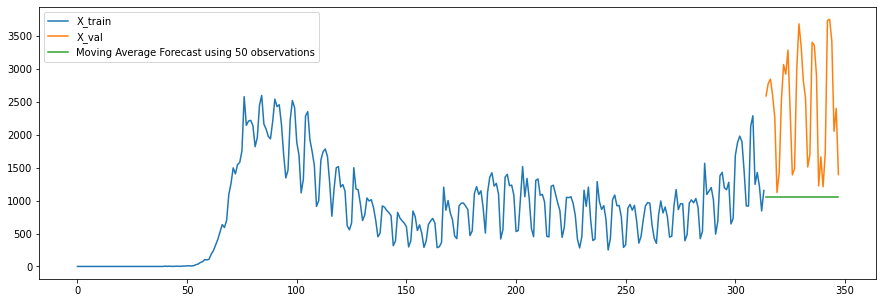

In [33]:
#moving average
# Considering rolling mean for last 10, 20, 50 days and visualize the results.
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [34]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, y_hat_avg.moving_avg_forecast)) 
print(rms)

1611.9764370851233


In [35]:
train = X_train.append(X_val)
train

,index,ds,add1,add2,y
0,54851,2020-01-22,0.0,0.0,0.0
1,54852,2020-01-23,0.0,0.0,0.0
2,54853,2020-01-24,1.0,0.0,0.0
3,54854,2020-01-25,0.0,0.0,0.0
4,54855,2020-01-26,3.0,0.0,0.0
...,...,...,...,...,...
343,55194,2020-12-30,229346.0,23069.0,3750.0
344,55195,2020-12-31,227315.0,0.0,3419.0
345,55196,2021-01-01,160606.0,0.0,2051.0
346,55197,2021-01-02,297491.0,0.0,2398.0


In [36]:
#predict on X_test
y_hat_avg = X_test.copy()
y_hat_avg['moving_avg_forecast'] = train['y'].rolling(50).mean().iloc[-1] # average of last 50 observations
y_hat_avg

,ds,add1,add2,moving_avg_forecast
0,2021-02-01,297491.0,23069.0,2116.08
1,2021-02-02,297491.0,23069.0,2116.08
2,2021-02-03,297491.0,23069.0,2116.08
3,2021-02-04,297491.0,23069.0,2116.08
4,2021-02-05,297491.0,23069.0,2116.08
5,2021-02-06,297491.0,23069.0,2116.08
6,2021-02-07,297491.0,23069.0,2116.08
7,2021-02-08,297491.0,23069.0,2116.08
8,2021-02-09,297491.0,23069.0,2116.08
9,2021-02-10,297491.0,23069.0,2116.08


In [37]:
X_val.index.max()

347

In [38]:
list_num = []
index = X_val.index.max()
for i in range(len(X_test)):
  index = index + 1
  list_num.append(index)
list_num

[348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375]

In [39]:
X_test['index'] = list_num
X_test

,ds,add1,add2,index
0,2021-02-01,297491.0,23069.0,348
1,2021-02-02,297491.0,23069.0,349
2,2021-02-03,297491.0,23069.0,350
3,2021-02-04,297491.0,23069.0,351
4,2021-02-05,297491.0,23069.0,352
5,2021-02-06,297491.0,23069.0,353
6,2021-02-07,297491.0,23069.0,354
7,2021-02-08,297491.0,23069.0,355
8,2021-02-09,297491.0,23069.0,356
9,2021-02-10,297491.0,23069.0,357


In [40]:
y_hat_avg['index'] = list_num
y_hat_avg

,ds,add1,add2,moving_avg_forecast,index
0,2021-02-01,297491.0,23069.0,2116.08,348
1,2021-02-02,297491.0,23069.0,2116.08,349
2,2021-02-03,297491.0,23069.0,2116.08,350
3,2021-02-04,297491.0,23069.0,2116.08,351
4,2021-02-05,297491.0,23069.0,2116.08,352
5,2021-02-06,297491.0,23069.0,2116.08,353
6,2021-02-07,297491.0,23069.0,2116.08,354
7,2021-02-08,297491.0,23069.0,2116.08,355
8,2021-02-09,297491.0,23069.0,2116.08,356
9,2021-02-10,297491.0,23069.0,2116.08,357


In [41]:
y_hat_avg.set_index(['index'], inplace=True)
y_hat_avg

,ds,add1,add2,moving_avg_forecast
index,,,,
348,2021-02-01,297491.0,23069.0,2116.08
349,2021-02-02,297491.0,23069.0,2116.08
350,2021-02-03,297491.0,23069.0,2116.08
351,2021-02-04,297491.0,23069.0,2116.08
352,2021-02-05,297491.0,23069.0,2116.08
353,2021-02-06,297491.0,23069.0,2116.08
354,2021-02-07,297491.0,23069.0,2116.08
355,2021-02-08,297491.0,23069.0,2116.08
356,2021-02-09,297491.0,23069.0,2116.08


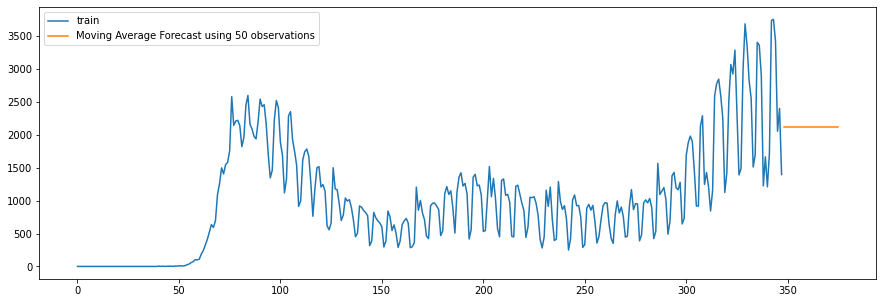

In [42]:
plt.figure(figsize=(15,5)) 
plt.plot(train['y'], label='train') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [43]:
#select last column from array
y_hat_avg.iloc[:,-1:] = y_hat_avg.iloc[:,-1:].astype(int)
print(y_hat_avg.iloc[:,-1:])

       moving_avg_forecast
index                     
348                   2116
349                   2116
350                   2116
351                   2116
352                   2116
353                   2116
354                   2116
355                   2116
356                   2116
357                   2116
358                   2116
359                   2116
360                   2116
361                   2116
362                   2116
363                   2116
364                   2116
365                   2116
366                   2116
367                   2116
368                   2116
369                   2116
370                   2116
371                   2116
372                   2116
373                   2116
374                   2116
375                   2116


In [44]:
prediction = y_hat_avg.moving_avg_forecast

prediction[prediction < 0] = 0

output = pd.DataFrame({'date': test.ds, 'new_death': prediction.values.astype(int)})
output.to_csv('p_new_death.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
#upload submission
p_new_death = pd.read_csv("p_new_death.csv")
p_new_death

,date,new_death
0,2021-02-01,2116
1,2021-02-02,2116
2,2021-02-03,2116
3,2021-02-04,2116
4,2021-02-05,2116
5,2021-02-06,2116
6,2021-02-07,2116
7,2021-02-08,2116
8,2021-02-09,2116
9,2021-02-10,2116


Vector Auto Regression VAR

In [46]:
X_train = X_train.drop(['ds'],axis=1)
X_train

,index,add1,add2,y
0,54851,0.0,0.0,0.0
1,54852,0.0,0.0,0.0
2,54853,1.0,0.0,0.0
3,54854,0.0,0.0,0.0
4,54855,3.0,0.0,0.0
...,...,...,...,...
309,55160,114434.0,18019.0,1245.0
310,55161,204183.0,18061.0,1426.0
311,55162,156000.0,18249.0,1212.0
312,55163,138320.0,18437.0,842.0


In [47]:
X_train.fillna(0,inplace=True)
X_train

,index,add1,add2,y
0,54851,0.0,0.0,0.0
1,54852,0.0,0.0,0.0
2,54853,1.0,0.0,0.0
3,54854,0.0,0.0,0.0
4,54855,3.0,0.0,0.0
...,...,...,...,...
309,55160,114434.0,18019.0,1245.0
310,55161,204183.0,18061.0,1426.0
311,55162,156000.0,18249.0,1212.0
312,55163,138320.0,18437.0,842.0


In [48]:
X_val = X_val.drop(['ds'],axis=1)
X_val

,index,add1,add2,y
314,55165,184079.0,19295.0,2588.0
315,55166,200820.0,19680.0,2775.0
316,55167,219884.0,19723.0,2843.0
317,55168,230139.0,19858.0,2594.0
318,55169,216087.0,19947.0,2257.0
319,55170,181394.0,20145.0,1122.0
320,55171,189926.0,20098.0,1419.0
321,55172,219009.0,20483.0,2520.0
322,55173,221929.0,20906.0,3064.0
323,55174,227604.0,21023.0,2920.0


In [49]:
X_test = X_test.drop(['ds'],axis=1)
X_test

,add1,add2,index
0,297491.0,23069.0,348
1,297491.0,23069.0,349
2,297491.0,23069.0,350
3,297491.0,23069.0,351
4,297491.0,23069.0,352
5,297491.0,23069.0,353
6,297491.0,23069.0,354
7,297491.0,23069.0,355
8,297491.0,23069.0,356
9,297491.0,23069.0,357


In [50]:
from statsmodels.tsa.vector_ar.var_model import VAR

start_index = X_val.index.min()
end_index = X_val.index.max()

# fit model
model = VAR(X_train)
model_fit = model.fit()
# make prediction
yhat = model_fit.forecast(model_fit.y, steps=len(X_val))
yhat = yhat.astype(int)
print(yhat)

[[ 55164 158881  18918   1419]
 [ 55165 159056  19090   1588]
 [ 55166 158559  19289   1701]
 [ 55167 157743  19498   1783]
 [ 55168 156802  19711   1847]
 [ 55169 155839  19921   1899]
 [ 55170 154908  20127   1945]
 [ 55171 154036  20327   1986]
 [ 55172 153236  20522   2023]
 [ 55173 152512  20711   2058]
 [ 55174 151865  20895   2091]
 [ 55175 151291  21073   2123]
 [ 55176 150788  21246   2153]
 [ 55177 150353  21415   2181]
 [ 55178 149981  21579   2209]
 [ 55179 149668  21739   2235]
 [ 55180 149412  21895   2261]
 [ 55181 149208  22048   2285]
 [ 55182 149053  22197   2309]
 [ 55183 148943  22343   2331]
 [ 55184 148877  22486   2353]
 [ 55185 148852  22626   2374]
 [ 55186 148863  22764   2395]
 [ 55187 148911  22899   2415]
 [ 55188 148991  23032   2434]
 [ 55189 149102  23163   2453]
 [ 55190 149243  23292   2471]
 [ 55191 149410  23420   2489]
 [ 55192 149603  23545   2506]
 [ 55193 149819  23669   2523]
 [ 55194 150058  23792   2540]
 [ 55195 150318  23913   2556]
 [ 55196

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning:

y is a deprecated alias for endog, will be removed in version 0.11.0



In [51]:
index = yhat[:,0]

In [52]:
y_pred = yhat[:,2]

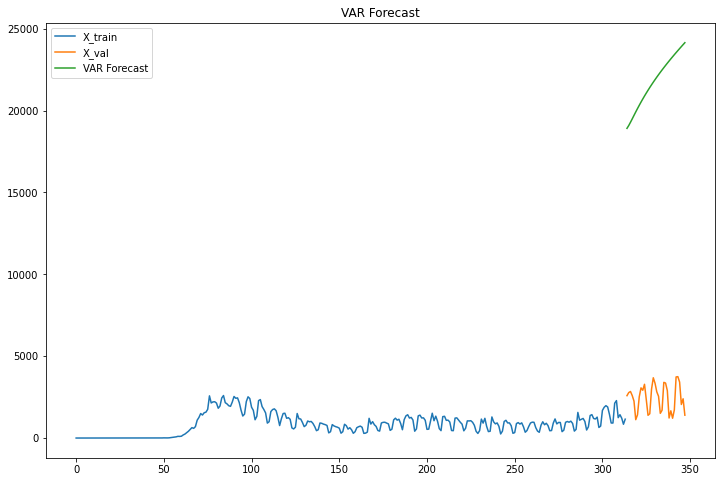

In [53]:
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(X_val.index,y_pred, label='VAR Forecast') 
plt.legend(loc='best') 
plt.title("VAR Forecast") 
plt.show()

In [54]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, y_pred)) 
print(rms)

19430.504766989456


Vector Moving Average

In [55]:
from statsmodels.tsa.statespace.varmax import VARMAX

model = VARMAX(X_train, order=(0,1))
model_fit = model.fit(disp=False)
yhat = model_fit.forecast(steps=len(X_val))
yhat = yhat.astype(int)
yhat

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:379: UserWarning:

Non-stationary starting moving-average parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



,index,add1,add2,y
314,55202,39294,29238,5314
315,55007,43337,7123,854
316,55007,43337,7123,854
317,55007,43337,7123,854
318,55007,43337,7123,854
319,55007,43337,7123,854
320,55007,43337,7123,854
321,55007,43337,7123,854
322,55007,43337,7123,854
323,55007,43337,7123,854


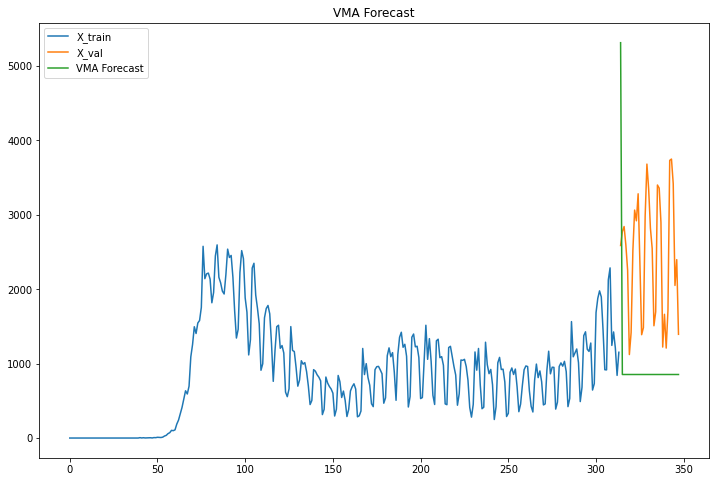

In [56]:
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(X_val.index,yhat.y, label='VMA Forecast') 
plt.legend(loc='best') 
plt.title("VMA Forecast") 
plt.show()

In [57]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, yhat.y)) 
print(rms)

1829.6175829937797


Vector Autoregression Moving-Average (VARMA)

In [58]:
from statsmodels.tsa.statespace.varmax import VARMAX

# fit model
model = VARMAX(X_train, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast(steps=len(X_val))
yhat = yhat.astype(int)
print(yhat)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:379: UserWarning:

Non-stationary starting moving-average parameters found. Using zeros as starting parameters.



     index   add1   add2     y
314  55202  39294  29238  5314
315  55007  43337   7123   854
316  55007  43337   7123   854
317  55007  43337   7123   854
318  55007  43337   7123   854
319  55007  43337   7123   854
320  55007  43337   7123   854
321  55007  43337   7123   854
322  55007  43337   7123   854
323  55007  43337   7123   854
324  55007  43337   7123   854
325  55007  43337   7123   854
326  55007  43337   7123   854
327  55007  43337   7123   854
328  55007  43337   7123   854
329  55007  43337   7123   854
330  55007  43337   7123   854
331  55007  43337   7123   854
332  55007  43337   7123   854
333  55007  43337   7123   854
334  55007  43337   7123   854
335  55007  43337   7123   854
336  55007  43337   7123   854
337  55007  43337   7123   854
338  55007  43337   7123   854
339  55007  43337   7123   854
340  55007  43337   7123   854
341  55007  43337   7123   854
342  55007  43337   7123   854
343  55007  43337   7123   854
344  55007  43337   7123   854
345  550

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



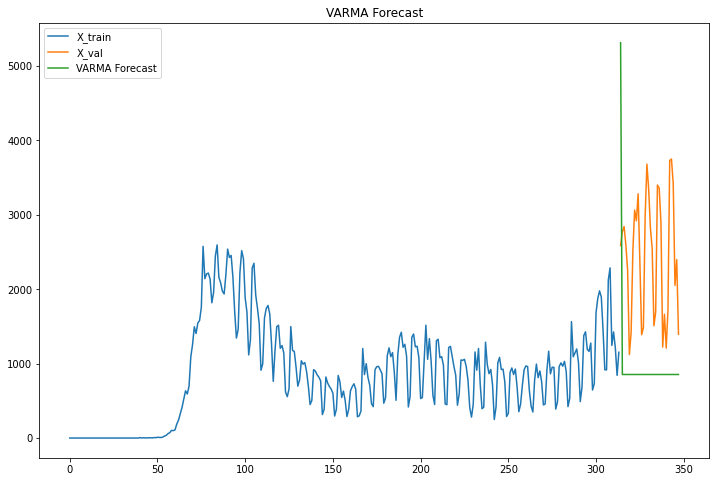

In [59]:
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(X_val.index,yhat.y, label='VARMA Forecast') 
plt.legend(loc='best') 
plt.title("VARMA Forecast") 
plt.show()

In [60]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, yhat.y)) 
print(rms)

1829.6175829937797
